**DEPUIS GOOGLE COLAB UNIQUEMENT**

In [ ]:
from google.colab import auth

In [ ]:
auth.authenticate_user()

In [ ]:
project_id = 'le-wagon-337814'
!gcloud config set project {project_id}
!gsutil ls

In [ ]:
! pip install --quiet git+https://github.com/christophelanson/icangetyoursmile

**---------------------------------------------------------------------------------------------------**

**EN LOCAL LANCER LES CELLULES A PARTIR D'ICI**

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random

In [2]:
from icangetyoursmile.utils import get_dataset_tts_from_gcp, get_dataset_tts_from_local
from icangetyoursmile.models import unet

**MODEL PARAMETERS**

In [30]:
data_source_is_gcp = True
model_name='U-net-colab-test'
sample_size = 100
image_size = (64,64)
unet_power = 3
epochs = 50
batch_size = 32
test_split = 0.2
random_seed = 1
path_to_data = '/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data' # if local, not used if cgp

**GET DATA**

In [31]:
if data_source_is_gcp == True:
    #data from gcp
    X_train, y_train, X_test, y_test, X_visu, y_visu = get_dataset_tts_from_gcp(sample_size=sample_size,
                                                                                image_size=image_size,
                                                                                random_seed=random_seed,
                                                                                test_split=test_split)
else:
    #data from local
    X_train, y_train, X_test, y_test, X_visu, y_visu = get_dataset_tts_from_local(path_to_data=path_to_data,
                                                                                  sample_size=sample_size,
                                                                                  image_size=image_size,
                                                                                  random_seed=random_seed,
                                                                                  test_split=test_split)

Connecting to gcp..
loading data  2201
loading data  9325
loading data  1033
loading data  4179
loading data  1931
loading data  8117
loading data  7364
loading data  7737
loading data  6219
loading data  3439
loading data  1537
loading data  7993
loading data  0464
loading data  6386
loading data  7090
loading data  9952
loading data  0034
loading data  7297
loading data  4363
loading data  3748
loading data  9685
loading data  1674
loading data  5200
loading data  0501
loading data  0365
loading data  0416
loading data  8870
loading data  0150
loading data  6245
loading data  3548
loading data  6915
loading data  0475
loading data  8644
loading data  3632
loading data  7174
loading data  8123
loading data  9058
loading data  3818
loading data  5663
loading data  3782
loading data  3584
loading data  7530
loading data  4747
loading data  0352
loading data  6818
loading data  9116
loading data  1638
loading data  3045
loading data  4856
loading data  1980
loading data  5450
loading dat

**INSTANTIATE MODEL and CALLBACKS**

In [32]:
input_size = (image_size[0], image_size[1],3)
model = unet(input_size=input_size)

In [33]:
# callback to save model training on 5 images
from icangetyoursmile.custom_callbacks import CustomCallback
image_log = dict()
save_predict = CustomCallback(X_visu, image_log)

In [34]:
# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience= 500, restore_best_weights=True)

**RELOAD MODEL FROM EXISTING ?**

In [15]:
# model must be saved locally ./saved_models/model_name
from icangetyoursmile.utils import loading_model
model = loading_model(model_name)

**FIT and SAVE (run again to refit from data)**

In [35]:
from icangetyoursmile.utils import save_model
from icangetyoursmile.trainer import upload_model_to_gcp

In [36]:
# Run this cell again to fit from previous parameters
results = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size,
                    epochs=epochs, use_multiprocessing=True, callbacks=[save_predict, early_stopping])
save_model(model, model_name)
upload_model_to_gcp(model_name, run_locally=False)

Epoch 1/50
3/3 [==============================] - 2s 385ms/step - loss: 10891.5908 - val_loss: 9984.4375
Epoch 2/50
3/3 [==============================] - 1s 227ms/step - loss: 9213.9551 - val_loss: 9750.7451
Epoch 3/50
3/3 [==============================] - 1s 230ms/step - loss: 8891.3076 - val_loss: 9406.1191
Epoch 4/50
3/3 [==============================] - 1s 231ms/step - loss: 8536.3740 - val_loss: 8937.1738
Epoch 5/50
3/3 [==============================] - 1s 232ms/step - loss: 8145.1807 - val_loss: 8335.9424
Epoch 6/50
3/3 [==============================] - 1s 220ms/step - loss: 7710.2373 - val_loss: 7861.2905
Epoch 7/50
3/3 [==============================] - 1s 197ms/step - loss: 7302.5952 - val_loss: 7425.2212
Epoch 8/50
3/3 [==============================] - 1s 235ms/step - loss: 6840.7451 - val_loss: 7042.2812
Epoch 9/50
3/3 [==============================] - 1s 234ms/step - loss: 6392.3037 - val_loss: 6620.3389
Epoch 10/50
3/3 [==============================] - 1s 215ms/ste

3/3 [==============================] - 1s 213ms/step - loss: 1523.9358 - val_loss: 1696.0944
Epoch 42/50
3/3 [==============================] - 1s 207ms/step - loss: 1497.8689 - val_loss: 1660.0299
Epoch 43/50
3/3 [==============================] - 1s 213ms/step - loss: 1472.0696 - val_loss: 1632.0115
Epoch 44/50
3/3 [==============================] - 1s 206ms/step - loss: 1453.6240 - val_loss: 1607.2725
Epoch 45/50
3/3 [==============================] - 1s 214ms/step - loss: 1431.2659 - val_loss: 1583.9702
Epoch 46/50
3/3 [==============================] - 1s 205ms/step - loss: 1406.8776 - val_loss: 1555.2318
Epoch 47/50
3/3 [==============================] - 1s 198ms/step - loss: 1385.3107 - val_loss: 1531.3610
Epoch 48/50
3/3 [==============================] - 1s 194ms/step - loss: 1364.4940 - val_loss: 1509.2517
Epoch 49/50
3/3 [==============================] - 1s 210ms/step - loss: 1341.6683 - val_loss: 1486.8005
Epoch 50/50
3/3 [==============================] - 1s 200ms/step - 

**PREDICT X_visu**

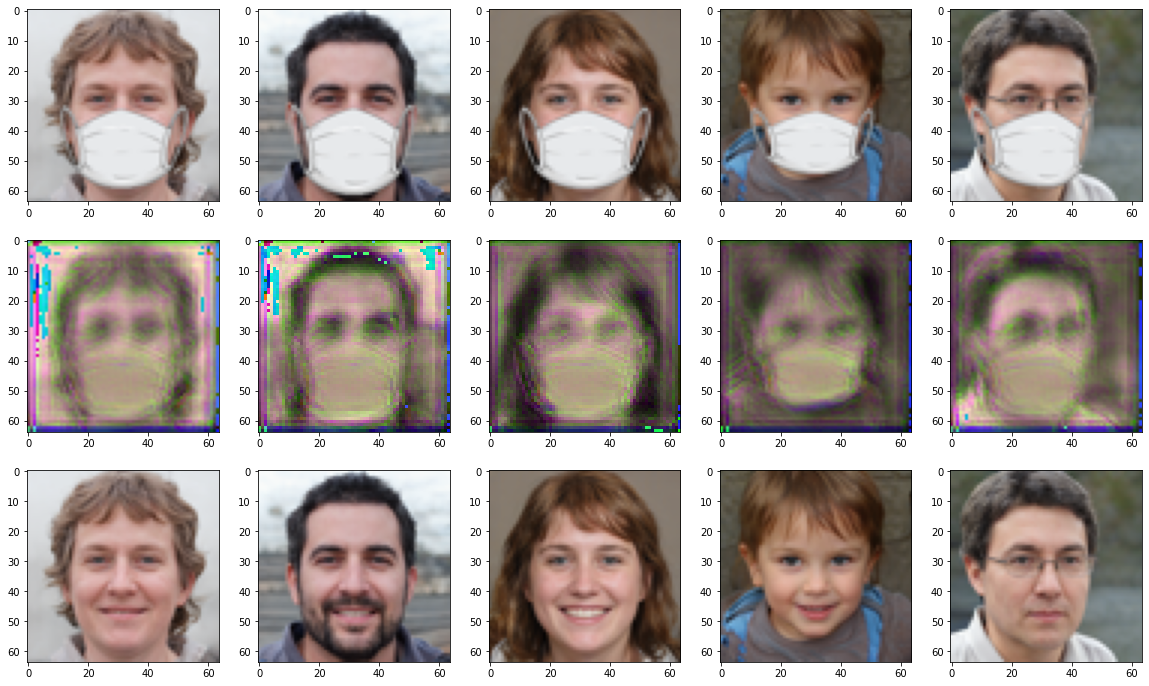

In [37]:
from icangetyoursmile.utils import plot_results
y_pred = model.predict(X_visu).astype(np.uint8)
plot_results(X_visu, y_pred, y_visu)